In [1]:
from config_submit1 import * #Set the configuration file name
conf = config()

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T
from tqdm import tqdm

In [3]:
root_path = "/data/datasets/TAU-urban-acoustic-scenes-2022-mobile-development/"
setup_path = root_path + "evaluation_setup/"

train_csv = pd.read_table(setup_path + "fold1_train.csv")

devices_train_list = [
        "a",
        "b",
        "c",
        "s1",
        "s2",
        "s3",
    ]

In [4]:
devices_list = []
for filename in tqdm(train_csv["filename"]):
    for device_train in devices_train_list:
        if re.search(device_train + ".wav", filename):
            devices_list.append(device_train)    

100%|██████████████████████████████████████████████████████████| 139620/139620 [00:00<00:00, 225015.25it/s]


In [5]:
train_csv["device_name"] = devices_list
display(train_csv.head())
train_csv.to_csv("fold1_train_add_device_name.csv")

,filename,scene_label,device_name
0,audio/airport-lisbon-1000-40000-0-a.wav,airport,a
1,audio/airport-lisbon-1000-40000-1-a.wav,airport,a
2,audio/airport-lisbon-1000-40000-2-a.wav,airport,a
3,audio/airport-lisbon-1000-40000-3-a.wav,airport,a
4,audio/airport-lisbon-1000-40000-4-a.wav,airport,a


In [6]:
n_mels = conf.n_mels
freq_bim = list(np.arange(0, n_mels, 1))

spectrogram = T.MelSpectrogram(
    sample_rate=conf.sample_rate,
    n_fft=conf.n_fft,
    win_length=conf.win_length,
    hop_length=conf.hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
    norm="slaney",
    onesided=True,
    n_mels=n_mels,
    mel_scale="htk",
)

In [7]:
a_file_list = train_csv[train_csv["device_name"]=="a"]
bcs_file_list = train_csv[train_csv["device_name"]!="a"]

In [8]:
dif_filename_list =[]
dif_freq_list =[]
dif_devive_list =[]

for filename_a in tqdm(a_file_list["filename"]):
    wave, _ = torchaudio.load(root_path + filename_a)

    spec_log_a = torch.log10(torch.mean(spectrogram(wave)[0,:,:],dim=1)+1e-6)

    filename_bcs = bcs_file_list[bcs_file_list["filename"].str.contains(filename_a[:-5])]
    
    if len(filename_bcs) >= 1:
        for filename_temp, device_temp in zip(filename_bcs["filename"], filename_bcs["device_name"]):
            dif_filename_list.append(filename_temp)
            wave, _ = torchaudio.load(root_path + filename_temp)

            spec_log_temp = torch.log10(torch.mean(spectrogram(wave)[0,:,:], dim=1) + 1e-10)
  
            dif_freq_temp = spec_log_temp - spec_log_a
            dif_freq_list.append(dif_freq_temp.detach().numpy().copy())
            dif_devive_list.append(device_temp)

100%|██████████████████████████████████████████████████████████████| 102150/102150 [28:31<00:00, 59.69it/s]


In [9]:
df = pd.DataFrame(dif_filename_list, columns=["filename"])
display(df)
df["device_name"] = dif_devive_list
df["dif_freq"] = dif_freq_list
df.to_pickle(f"reuse/{conf.reusefolder}/diff_freq.pkl")

,filename
0,audio/airport-lisbon-1000-40000-0-s3.wav
1,audio/airport-lisbon-1000-40000-1-s3.wav
2,audio/airport-lisbon-1000-40000-2-s3.wav
3,audio/airport-lisbon-1000-40000-3-s3.wav
4,audio/airport-lisbon-1000-40000-4-s3.wav
...,...
37465,audio/tram-milan-1146-44069-5-s3.wav
37466,audio/tram-milan-1146-44069-6-s3.wav
37467,audio/tram-milan-1146-44069-7-s3.wav
37468,audio/tram-milan-1146-44069-8-s3.wav


In [10]:
dif_devices_train_list = [
        "b",
        "c",
        "s1",
        "s2",
        "s3",
    ]

(7490, 256)
(7490, 256)
(7480, 256)
(7480, 256)
(7500, 256)
(7500, 256)
(7500, 256)
(7500, 256)
(7500, 256)
(7500, 256)


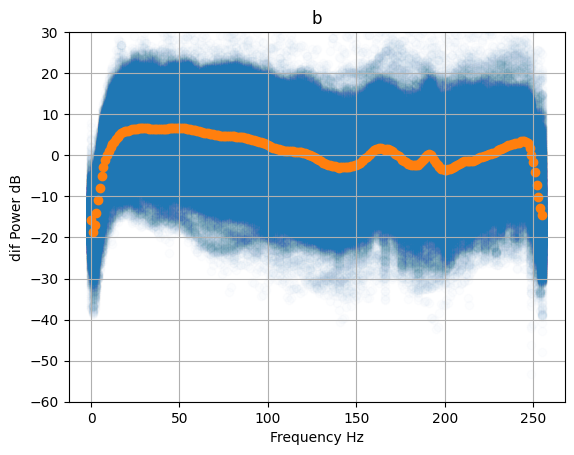

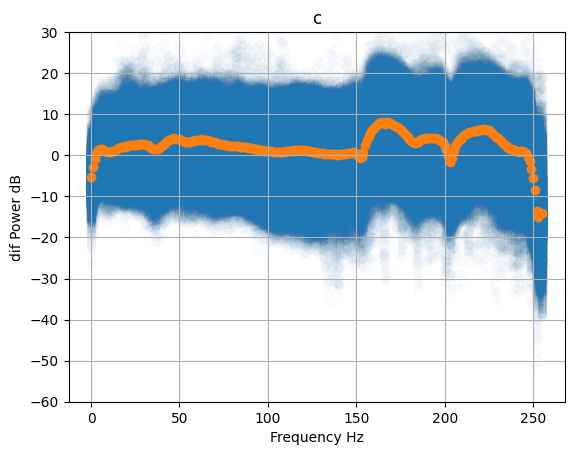

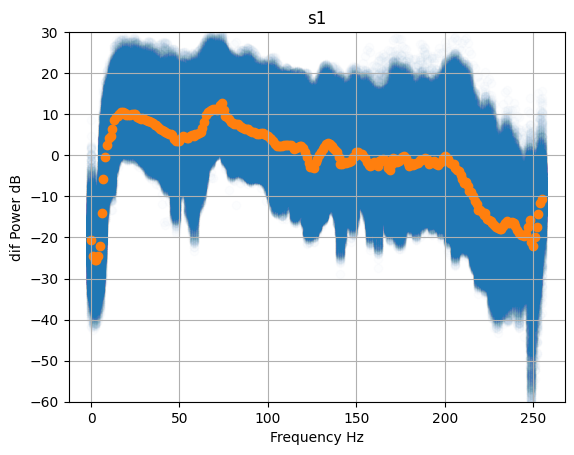

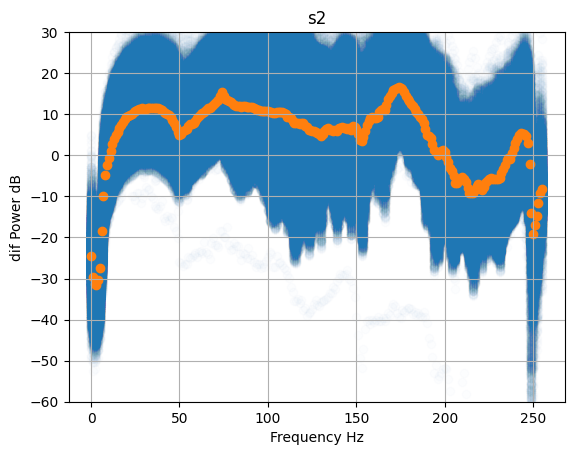

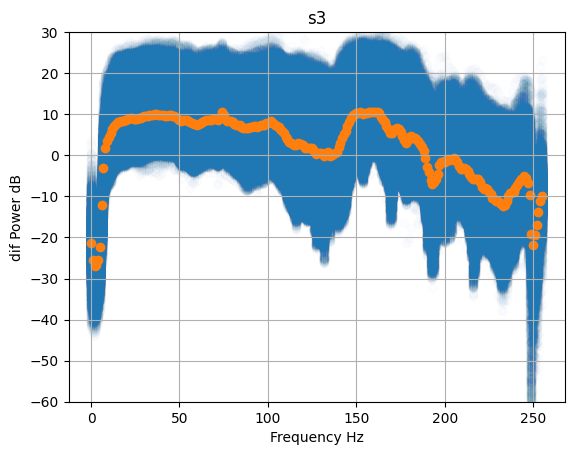

In [11]:
for dddd in dif_devices_train_list:
    plot_y = np.stack(10*df[df["device_name"]==dddd]["dif_freq"].values)
    plot_x = np.tile(np.array(freq_bim),(len(plot_y),1))
    print(plot_y.shape)
    print(plot_x.shape)
    fig, ax = plt.subplots()
    ax.scatter(x=plot_x, y=plot_y, alpha=0.01)
    ax.scatter(freq_bim, np.mean(plot_y, axis=0))
    plt.title(dddd)
    plt.xlabel("Frequency Hz")
    plt.ylabel("dif Power dB")
    plt.ylim([-60, 30])
    plt.grid()

VAl

In [12]:
train_csv = pd.read_table(setup_path + "fold1_evaluate.csv")

devices_train_list = [
        "a",
        "b",
        "c",
        "s1",
        "s2",
        "s3",
        "s4",
        "s5",
        "s6",
    ]

In [13]:
devices_list = []
for filename in tqdm(train_csv["filename"]):
    for device_train in devices_train_list:
        if re.search(device_train + ".wav", filename):
            devices_list.append(device_train)  

100%|████████████████████████████████████████████████████████████| 29680/29680 [00:00<00:00, 134849.16it/s]


In [14]:
train_csv["device_name"] = devices_list
display(train_csv.head())
train_csv.to_csv("fold1_train_add_device_name_val.csv")

,filename,scene_label,device_name
0,audio/airport-barcelona-203-6129-0-a.wav,airport,a
1,audio/airport-barcelona-203-6129-1-a.wav,airport,a
2,audio/airport-barcelona-203-6129-2-a.wav,airport,a
3,audio/airport-barcelona-203-6129-3-a.wav,airport,a
4,audio/airport-barcelona-203-6129-4-a.wav,airport,a


In [15]:
a_file_list = train_csv[train_csv["device_name"]=="a"]
bcs_file_list = train_csv[train_csv["device_name"]!="a"]

In [16]:
dif_filename_list =[]
dif_freq_list =[]
dif_devive_list =[]

In [17]:
for filename_a in tqdm(a_file_list["filename"]):
    wave, _ = torchaudio.load(root_path + filename_a)
    spec_log_a = torch.log10(torch.mean(spectrogram(wave)[0,:,:],dim=1)+1e-6)
    
    filename_bcs = bcs_file_list[bcs_file_list["filename"].str.contains(filename_a[:-5])]
    
    if len(filename_bcs) >= 1:
        for filename_temp, device_temp in zip(filename_bcs["filename"], filename_bcs["device_name"]):
            dif_filename_list.append(filename_temp)
            wave, _ = torchaudio.load(root_path + filename_temp)
            spec_log_temp = torch.log10(torch.mean(spectrogram(wave)[0,:,:], dim=1) + 1e-6)

            dif_freq_temp = spec_log_temp - spec_log_a
            dif_freq_list.append(dif_freq_temp.detach().numpy().copy())
            dif_devive_list.append(device_temp)

100%|██████████████████████████████████████████████████████████████████| 3300/3300 [01:01<00:00, 53.74it/s]


In [18]:
df = pd.DataFrame(dif_filename_list, columns=["filename"])
df["device_name"] = dif_devive_list
df["dif_freq"] = dif_freq_list
display(df)
df.to_pickle(f"reuse/{conf.reusefolder}diff_freq_val.pkl")

,filename,device_name,dif_freq
0,audio/airport-barcelona-203-6132-0-s1.wav,s1,"[-2.3712723, -3.0126944, -2.9789243, -2.912822..."
1,audio/airport-barcelona-203-6132-0-s3.wav,s3,"[-2.8295155, -3.4927874, -3.4815636, -3.433809..."
2,audio/airport-barcelona-203-6132-0-s5.wav,s5,"[-4.4388194, -4.501893, -4.413185, -4.1724997,..."
3,audio/airport-barcelona-203-6132-0-s6.wav,s6,"[-3.3688526, -3.9675255, -4.108394, -3.995102,..."
4,audio/airport-barcelona-203-6132-1-s1.wav,s1,"[-2.404722, -2.735648, -2.8306494, -2.9016438,..."
...,...,...,...
2505,audio/tram-helsinki-276-8405-5-b.wav,b,"[-2.248912, -2.0148695, -1.5240332, -1.2506976..."
2506,audio/tram-helsinki-276-8405-6-b.wav,b,"[-1.5896595, -1.6916233, -1.3741511, -1.248703..."
2507,audio/tram-helsinki-276-8405-7-b.wav,b,"[-1.7394674, -1.5313212, -1.3066434, -1.209776..."
2508,audio/tram-helsinki-276-8405-8-b.wav,b,"[-1.9664054, -1.8208466, -1.4947321, -1.306109..."


In [19]:
dif_devices_train_list = [
        "b",
        "c",
        "s1",
        "s2",
        "s3",
        "s4",
        "s5",
        "s6",
    ]

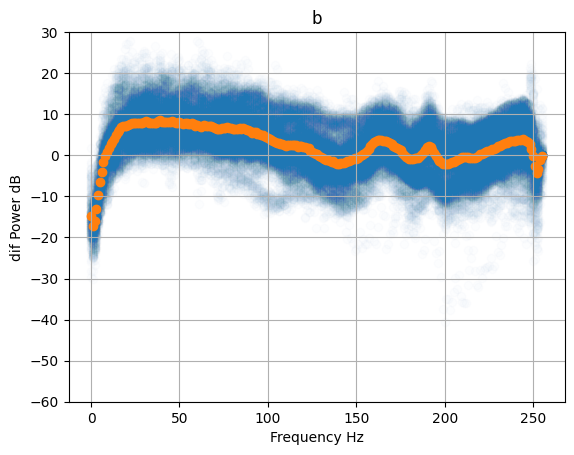

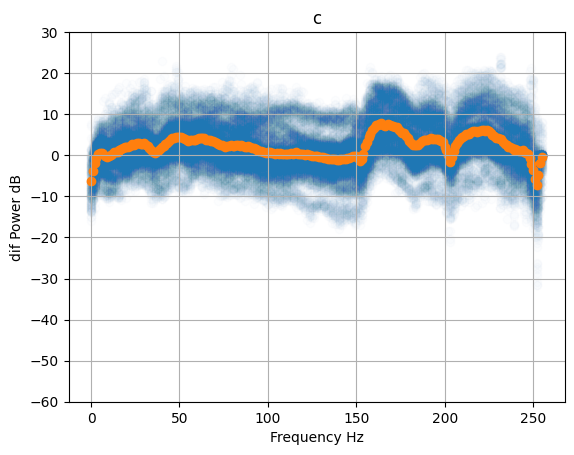

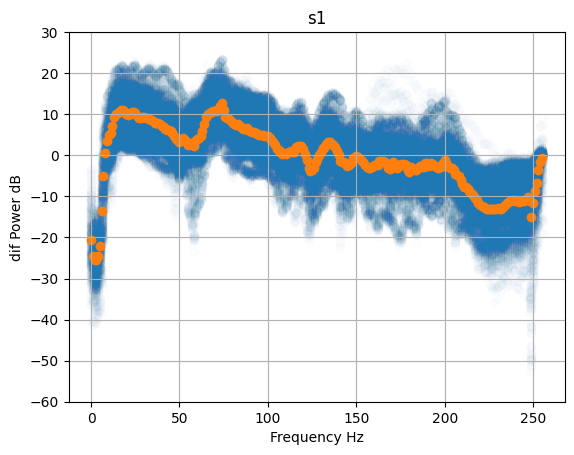

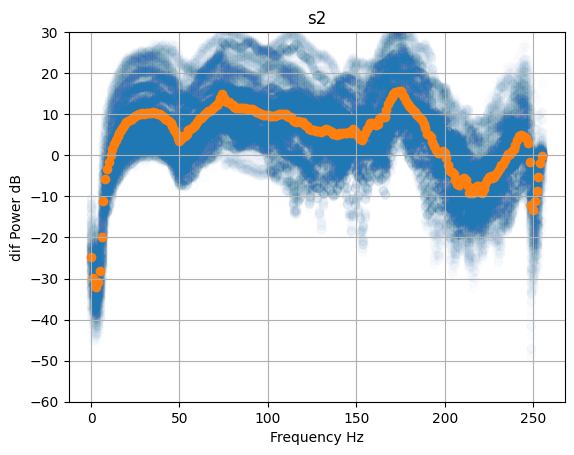

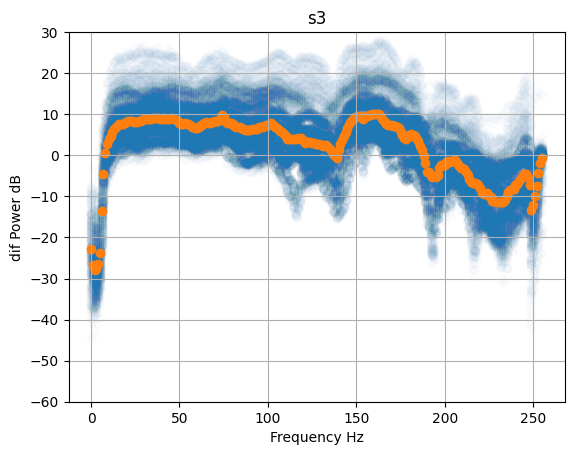

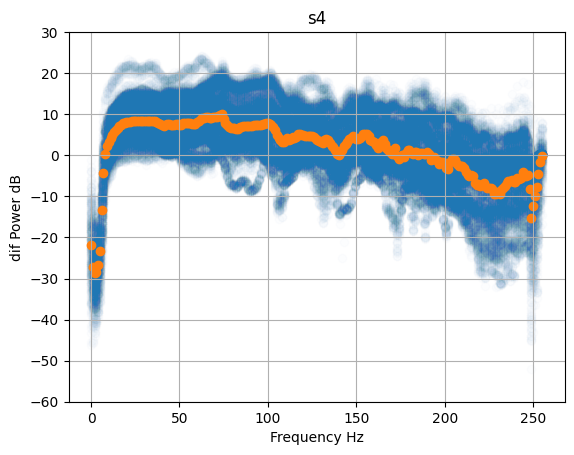

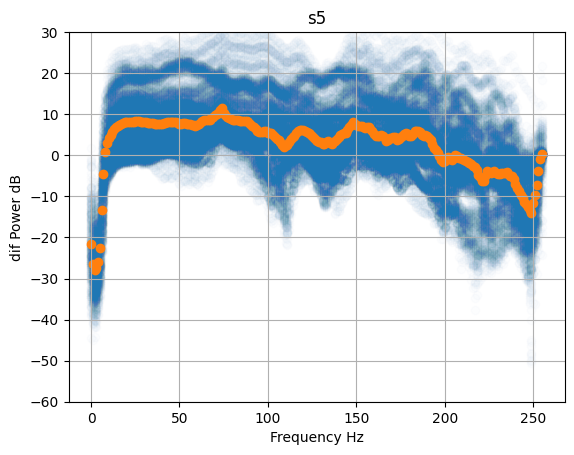

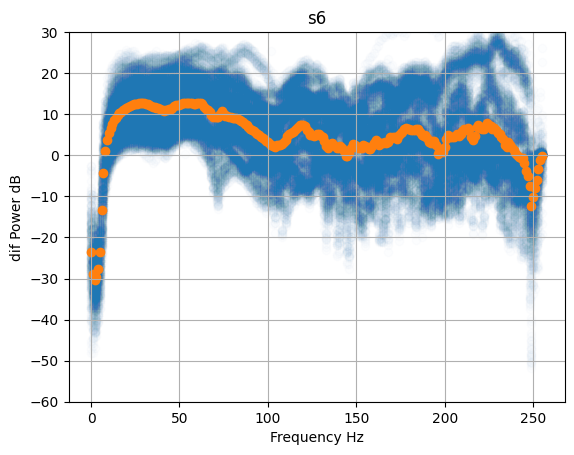

In [20]:
for dddd in dif_devices_train_list:
    plot_y = np.stack(10*df[df["device_name"]==dddd]["dif_freq"].values)
    plot_x = np.tile(np.array(freq_bim), (len(plot_y),1))
    fig, ax = plt.subplots()
    ax.scatter(x=plot_x, y=plot_y, alpha=0.01)
    ax.scatter(freq_bim, np.mean(plot_y, axis=0))
    plt.title(dddd)
    plt.xlabel("Frequency Hz")
    plt.ylabel("dif Power dB")
    plt.ylim([-60, 30])
    plt.grid()